# **Handcrafted Features & Fully Connected Neural Network (NN)**

The following code trains a fully connected neural network model with the handcrafted features extracted from the audio files. The [TensorFlow](https://github.com/tensorflow/tensorflow) library was used to set up and train the model.

Using a fully connected neural network (also known as a dense network or multi-layer perceptron, MLP) for audio classification can be advantageous for several reasons. Although convolutional neural networks (CNNs) and recurrent neural networks (RNNs) are more commonly used for audio classification tasks due to their ability to handle spatial and temporal data, fully connected networks still have their place in certain scenarios for reasons such as:

* **Simplicity and Ease of Implementation**: Fully connected neural networks have a straightforward architecture with fewer hyperparameters to tune compared to more complex models like CNNs or RNNs, making them easy to implement and understand.
* **Effective with Handcrafted Features**: Α fully connected neural network can effectively use extracted meaningful features from the audio data (like energy, chrome etc.) for classification.
* **Versatility**: Fully connected networks are universal function approximators, meaning they can, in theory, model any function given enough neurons and layers.


> When applied to the test set, the model achieves an **accuracy** of **75.8%** and an **F1** (macro) **score** of **73.1%** (with initial units 512 and batch size 64).


## 1. Mount the Google Drive to the Colab environment

In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/'
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/

Mounted at /content/drive
/content/drive/My Drive/GitHub/MarineMammalSoundClassification


## 2. Import the necessary libraries and scripts

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
from utils.NN_functions import load_data, create_model, train_model, evaluate_model, save_model, load_model
from utils.display import display_model_evaluation
from utils.utilities import ensure_dir

## 3. Train and Εvaluate the Model

A fully connected neural network comprises a series of layers where each neuron is connected to every neuron in the subsequent layer. To determine the optimal architecture for our project, we experimented with various configurations, including different initial units (2048, 1024, or 512), batch sizes (16, 32, or 64), and the inclusion of BatchNormalization or Dropout layers. Below, we present the configurations with the best results.

In [3]:
trainX, trainY, _ = load_data('handcrafted_features/train_features.csv')
valX, valY, _ = load_data('handcrafted_features/val_features.csv')

def process_pipeline(model_name, initial_units=2048, batch_norm=True, dropout=False, epochs=100, batch_size=32, patience=5):
    """
    Performs the entire pipeline of processing, training, evaluating, and saving a neural network model.

    Args:
    model_name (str): The name to be used for saving the model and HTML output.
    initial_units (int, optional): The number of units in the first dense layer. Defaults to 2048.
    batch_norm (bool, optional): Whether to include batch normalization layers. Defaults to True.
    dropout (bool, optional): Whether to include dropout layers. Defaults to False.
    epochs (int, optional): The number of epochs to train the model. Defaults to 100.
    batch_size (int, optional): The batch size to use during training. Defaults to 32.
    patience (int, optional): The number of epochs with no improvement after which training will be stopped. Defaults to 5.
    """
    # Create and train the model
    model = create_model(initial_units, trainX.shape[1], 28, batch_norm, dropout)
    history = train_model(model, trainX, trainY, valX, valY, epochs, batch_size, patience)

    # Create directory for saving models if it doesn't exist
    ensure_dir('models/NN')

    # Save the trained model
    model_path = os.path.join('models/NN', model_name+'.keras')
    save_model(model, model_path)

    # Load the saved model
    loaded_model = load_model(model_path)

    # Load test data and evaluate the model
    testX, testY, encoder = load_data('handcrafted_features/test_features.csv')
    conf_matrix, accuracy, f1 = evaluate_model(loaded_model, testX, testY)

    labels = list(encoder.classes_)

    display_model_evaluation('NN', f'initial_units = {initial_units} | batch_norm = {batch_norm} | dropout = {dropout} | epochs = {epochs} | batch_size = {batch_size} | patience = {patience}',\
                          history.history, accuracy, f1, conf_matrix, labels)

Epoch 1/150
40/40 [==============================] - 6s 66ms/step - loss: 3.4188 - accuracy: 0.1069 - val_loss: 5.6006 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - 3s 86ms/step - loss: 3.0855 - accuracy: 0.1443 - val_loss: 3.6844 - val_accuracy: 0.0643 - lr: 0.0010
Epoch 3/150
40/40 [==============================] - 3s 75ms/step - loss: 2.8081 - accuracy: 0.2041 - val_loss: 3.3737 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 4/150
40/40 [==============================] - 2s 54ms/step - loss: 2.6843 - accuracy: 0.2297 - val_loss: 3.2236 - val_accuracy: 0.0643 - lr: 0.0010
Epoch 5/150
40/40 [==============================] - 2s 53ms/step - loss: 2.5786 - accuracy: 0.2528 - val_loss: 3.2700 - val_accuracy: 0.0786 - lr: 0.0010
Epoch 6/150
40/40 [==============================] - 2s 54ms/step - loss: 2.4583 - accuracy: 0.2839 - val_loss: 3.1205 - val_accuracy: 0.1357 - lr: 0.0010
Epoch 7/150
40/40 [==============================] - 2s 52ms/step - lo

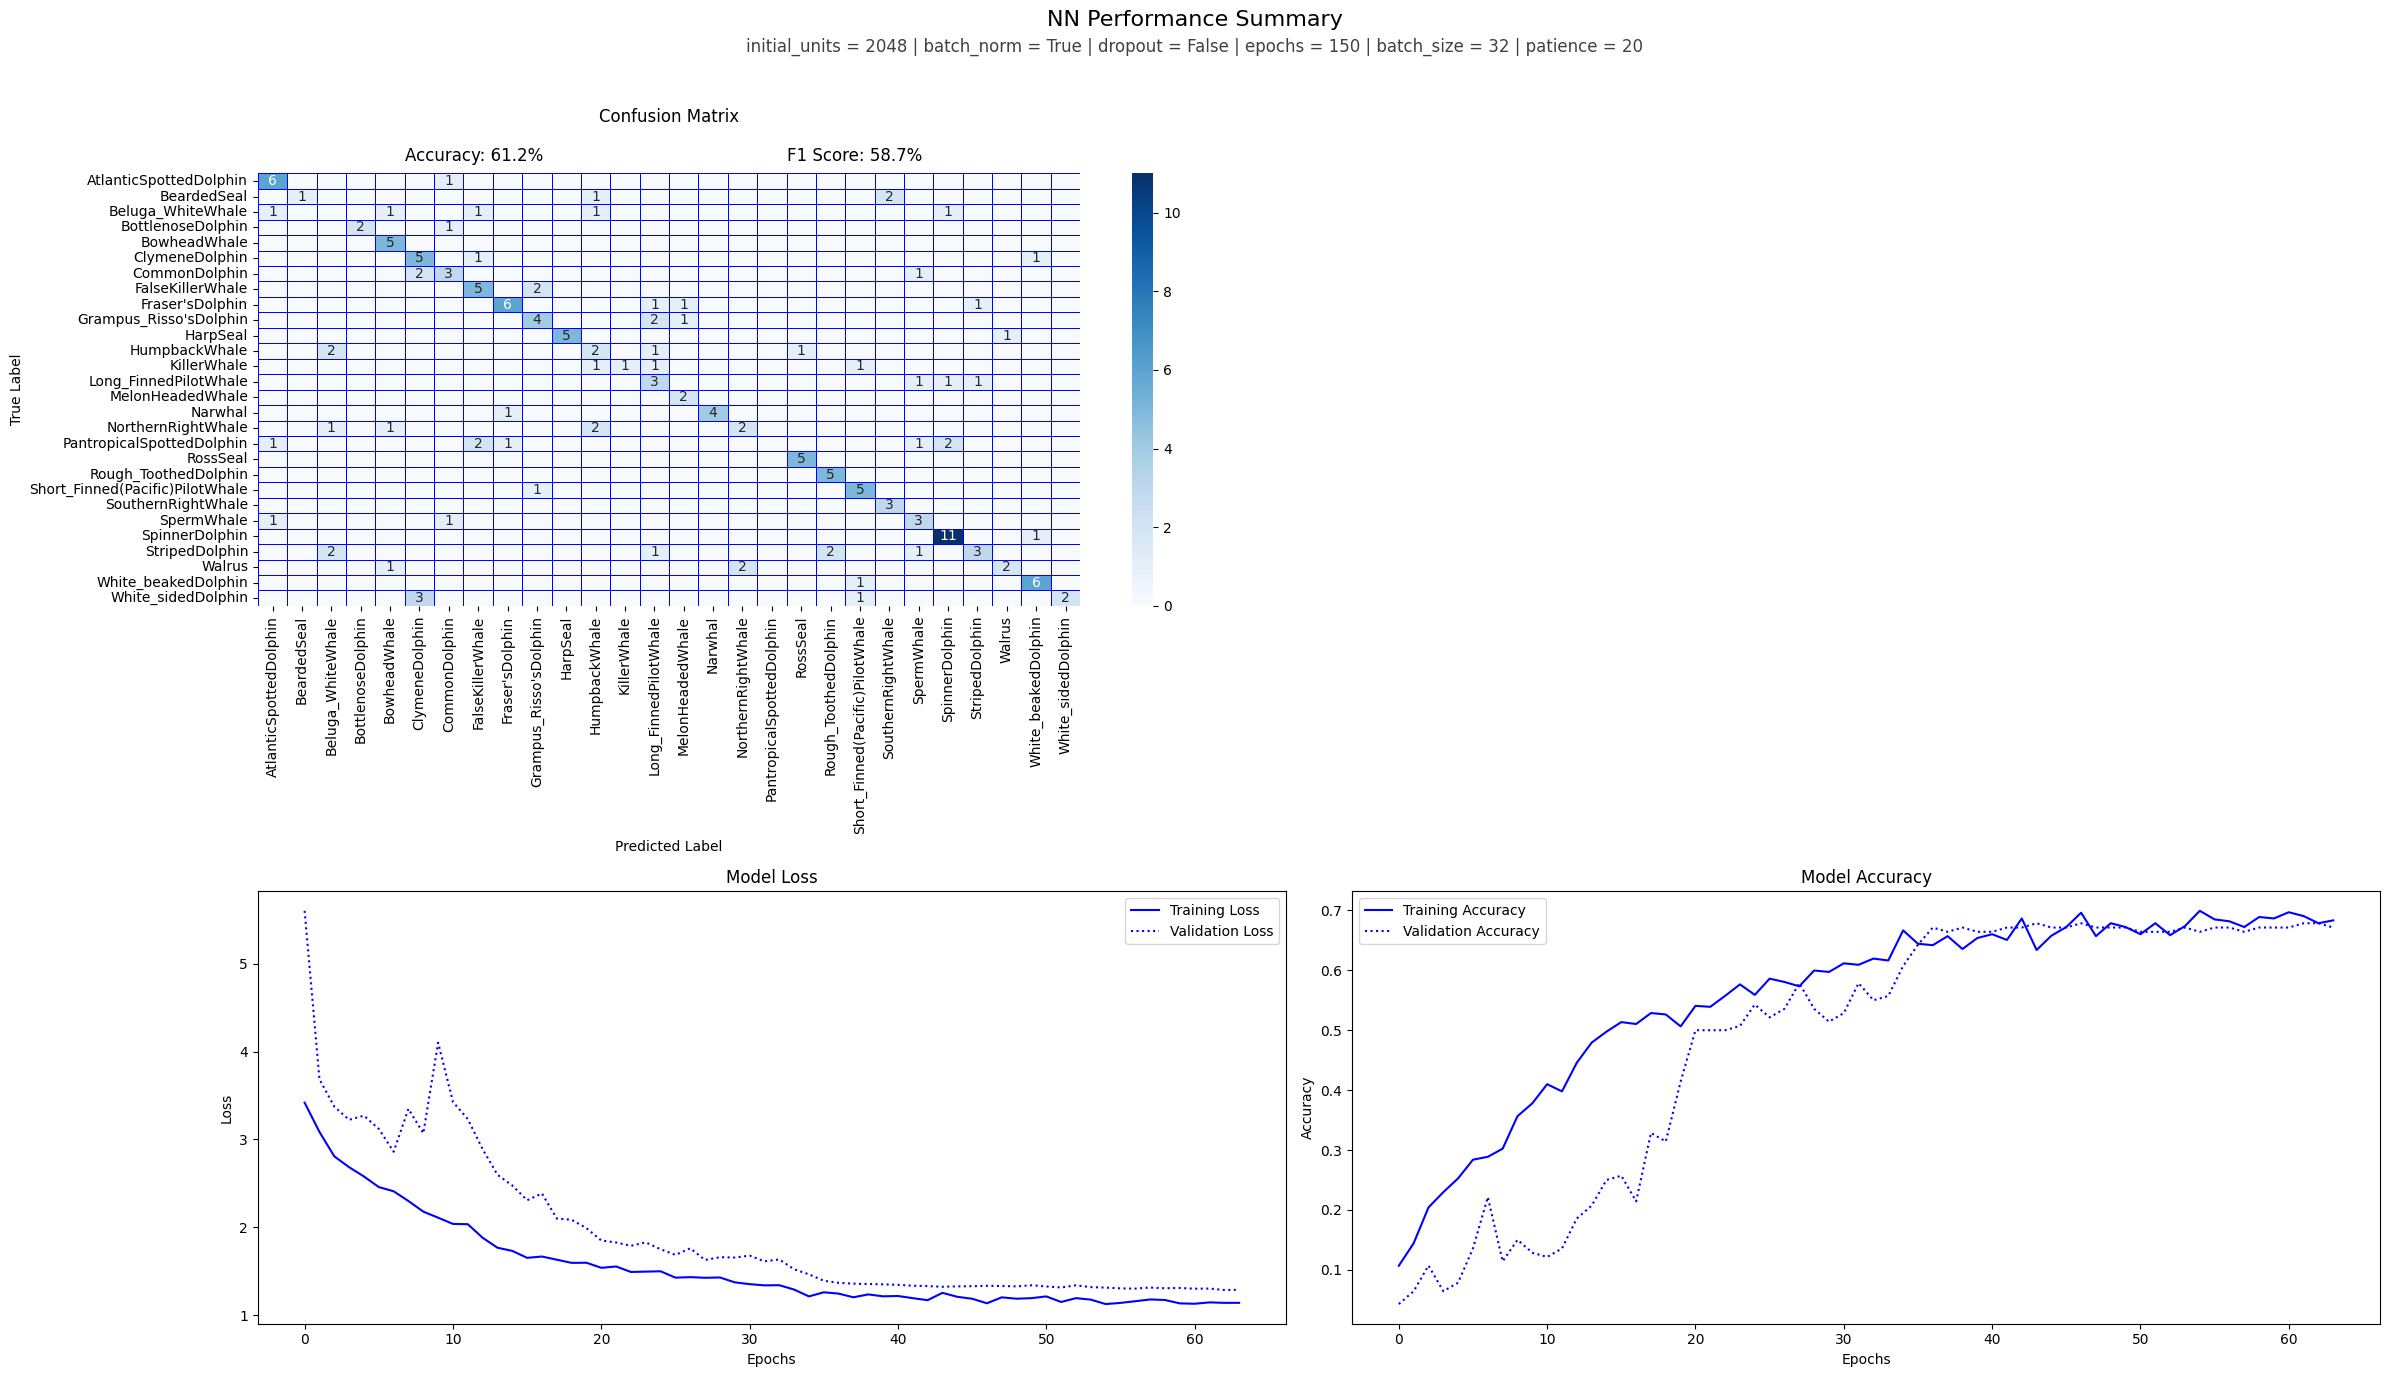

In [4]:
process_pipeline('2048_150_32_20', 2048, True, False, 150, 32, 20)

Epoch 1/150
40/40 [==============================] - 4s 35ms/step - loss: 3.3137 - accuracy: 0.1244 - val_loss: 3.8930 - val_accuracy: 0.0143 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - 1s 26ms/step - loss: 2.9149 - accuracy: 0.2073 - val_loss: 3.3746 - val_accuracy: 0.0571 - lr: 0.0010
Epoch 3/150
40/40 [==============================] - 1s 27ms/step - loss: 2.6961 - accuracy: 0.2600 - val_loss: 3.3005 - val_accuracy: 0.0929 - lr: 0.0010
Epoch 4/150
40/40 [==============================] - 1s 28ms/step - loss: 2.4426 - accuracy: 0.3110 - val_loss: 3.1292 - val_accuracy: 0.0786 - lr: 0.0010
Epoch 5/150
40/40 [==============================] - 1s 28ms/step - loss: 2.3400 - accuracy: 0.3477 - val_loss: 3.1187 - val_accuracy: 0.0929 - lr: 0.0010
Epoch 6/150
40/40 [==============================] - 1s 19ms/step - loss: 2.1723 - accuracy: 0.3820 - val_loss: 2.8567 - val_accuracy: 0.2071 - lr: 0.0010
Epoch 7/150
40/40 [==============================] - 1s 18ms/step - lo

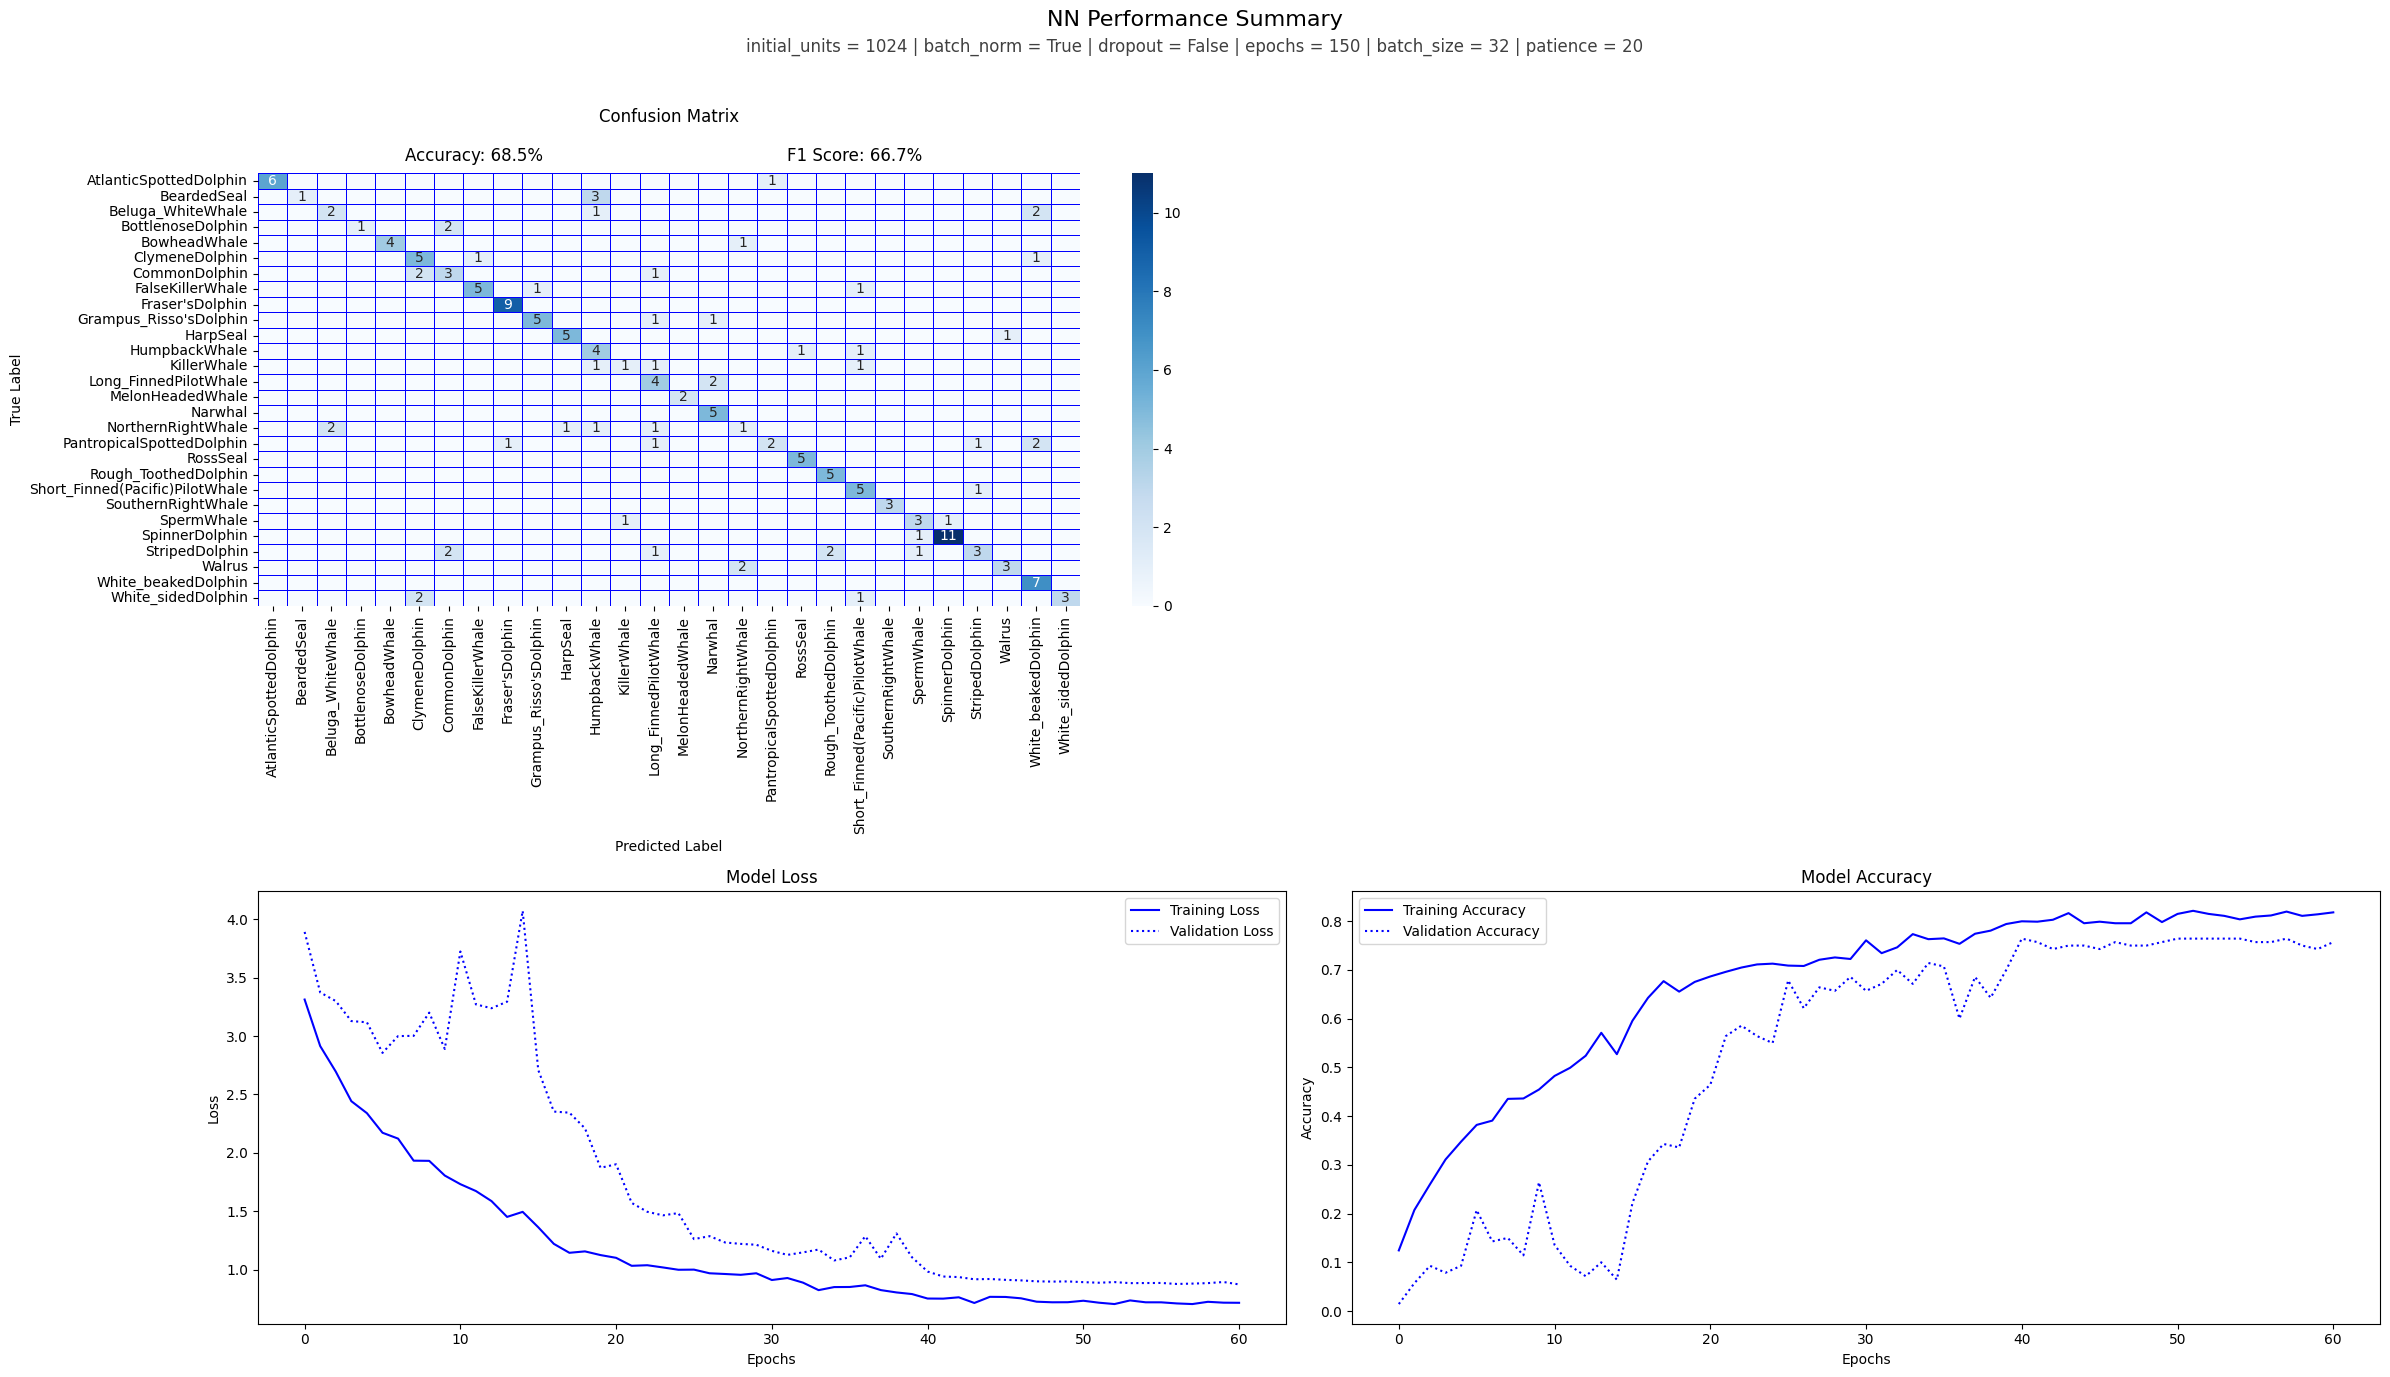

In [5]:
process_pipeline('1024_150_32_20', 1024, True, False, 150, 32, 20)

Epoch 1/150
79/79 [==============================] - 4s 17ms/step - loss: 3.3887 - accuracy: 0.1053 - val_loss: 3.3705 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 2/150
79/79 [==============================] - 1s 12ms/step - loss: 2.9454 - accuracy: 0.1866 - val_loss: 3.3424 - val_accuracy: 0.0786 - lr: 0.0010
Epoch 3/150
79/79 [==============================] - 1s 11ms/step - loss: 2.7096 - accuracy: 0.2257 - val_loss: 3.3678 - val_accuracy: 0.1143 - lr: 0.0010
Epoch 4/150
79/79 [==============================] - 1s 7ms/step - loss: 2.5850 - accuracy: 0.2719 - val_loss: 2.9862 - val_accuracy: 0.1714 - lr: 0.0010
Epoch 5/150
79/79 [==============================] - 1s 6ms/step - loss: 2.4153 - accuracy: 0.3078 - val_loss: 3.0646 - val_accuracy: 0.1214 - lr: 0.0010
Epoch 6/150
79/79 [==============================] - 1s 7ms/step - loss: 2.3203 - accuracy: 0.3238 - val_loss: 2.9198 - val_accuracy: 0.1857 - lr: 0.0010
Epoch 7/150
79/79 [==============================] - 1s 7ms/step - loss: 

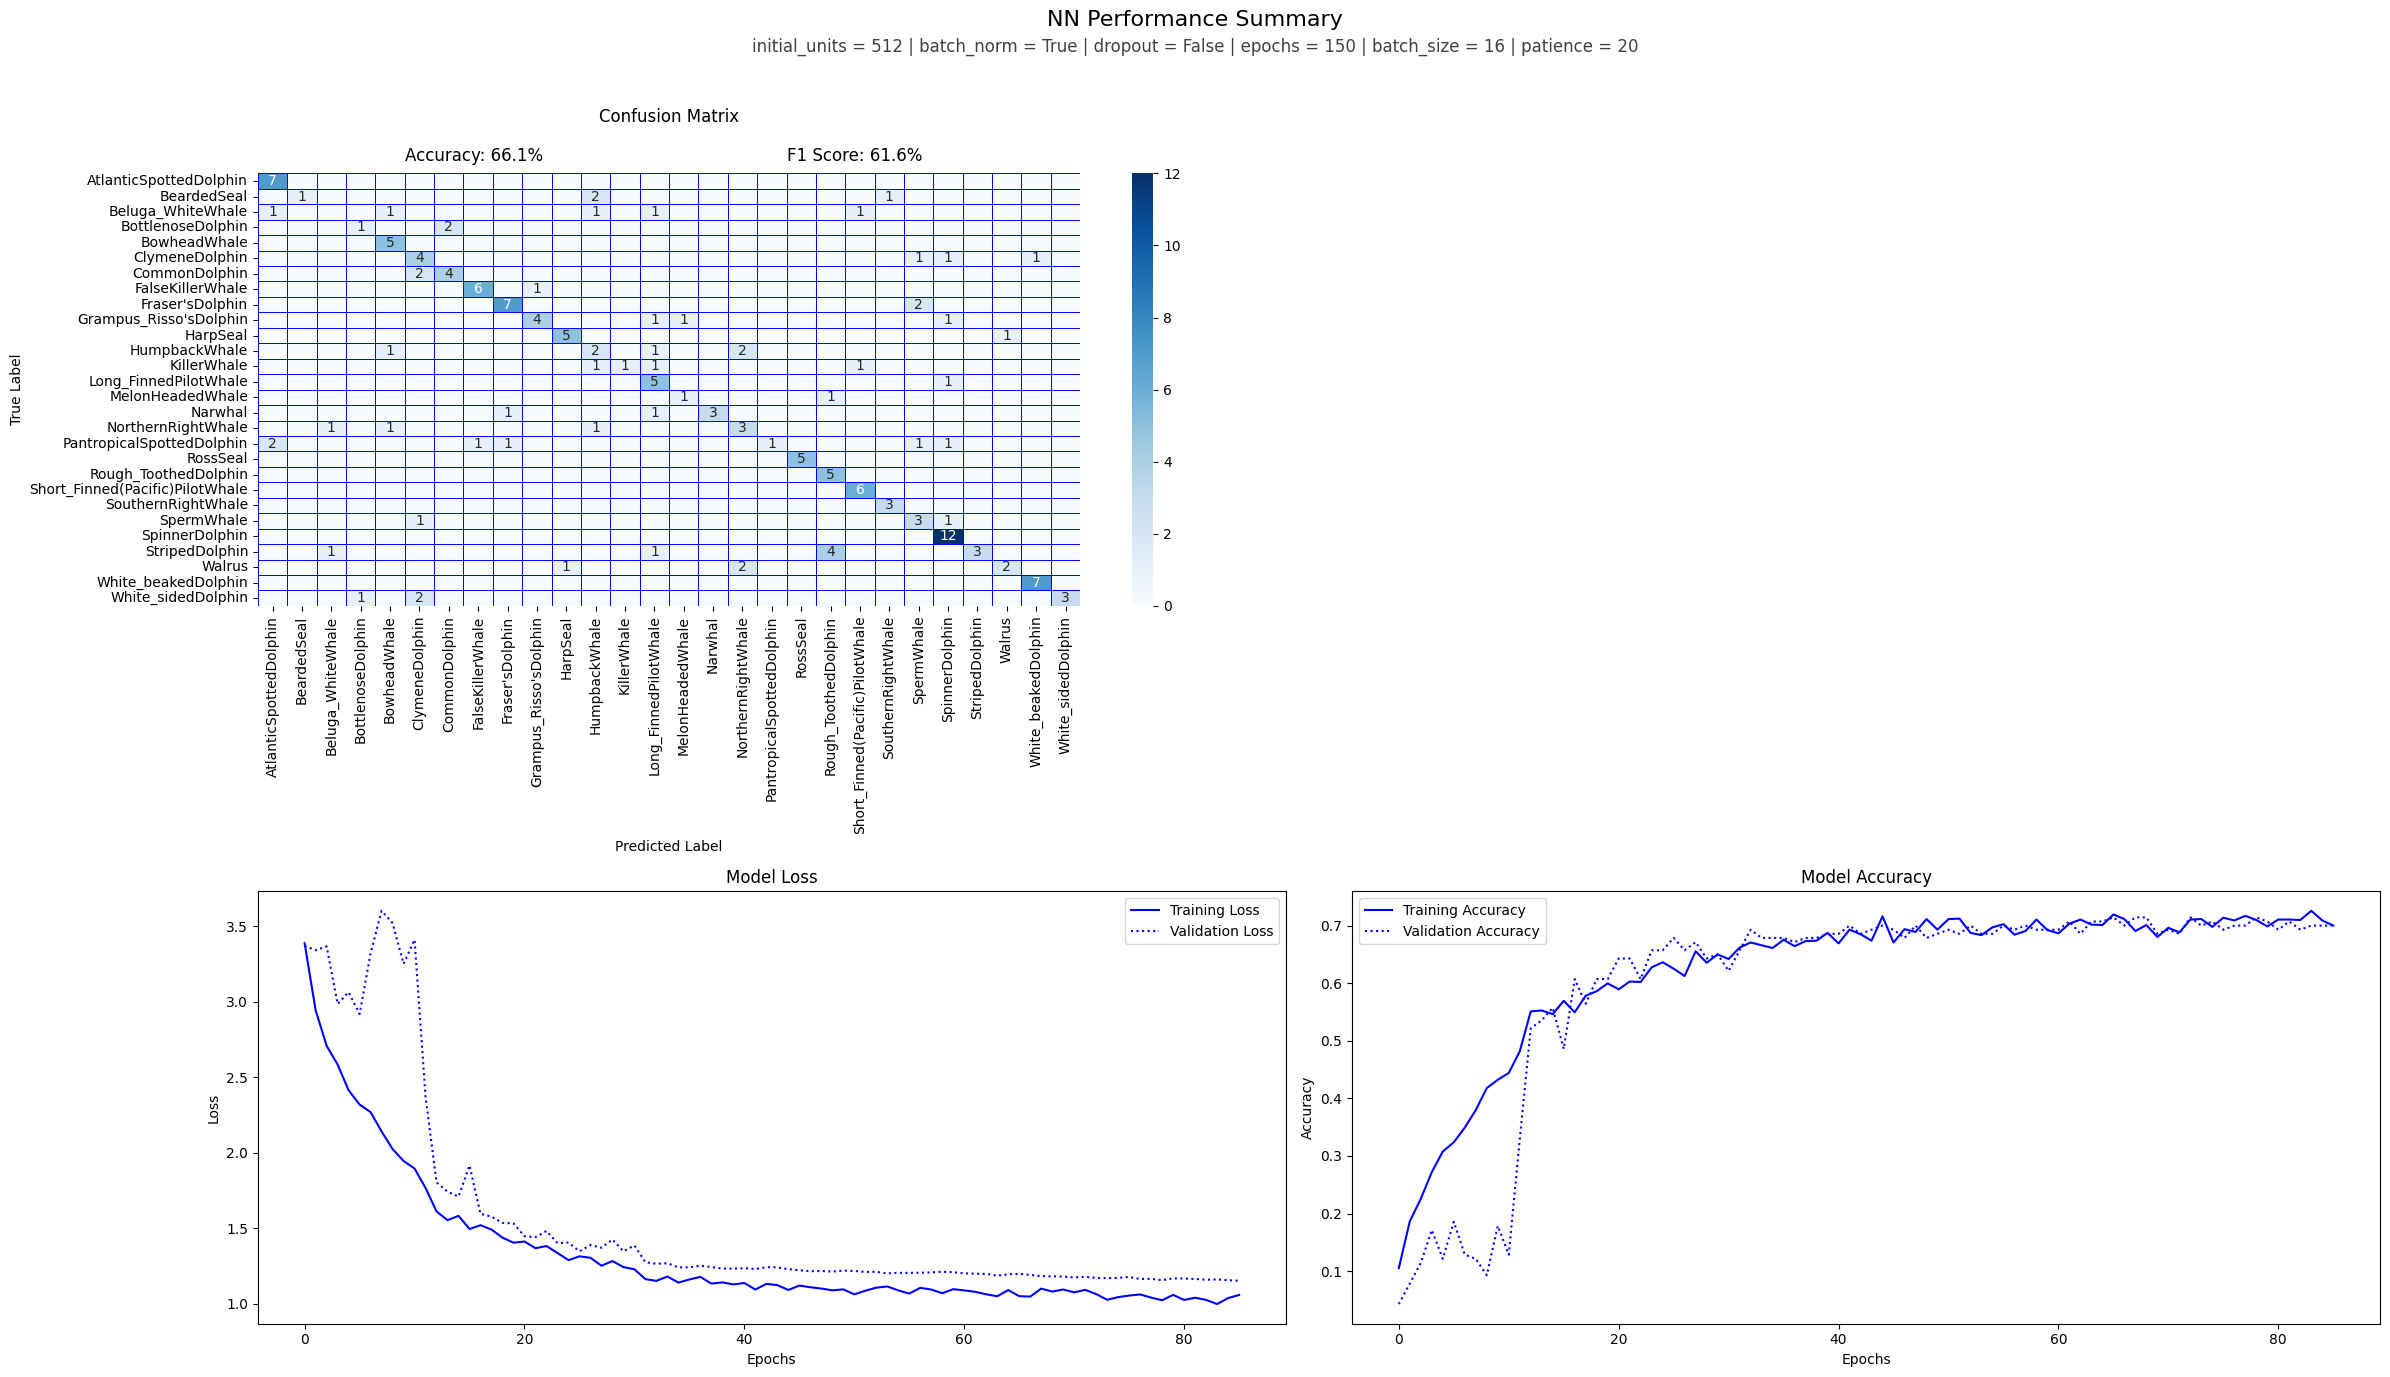

In [6]:
process_pipeline('512_150_16_20', 512, True, False, 150, 16, 20)

Epoch 1/150
40/40 [==============================] - 3s 16ms/step - loss: 3.2270 - accuracy: 0.1348 - val_loss: 4.4379 - val_accuracy: 0.0214 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - 0s 9ms/step - loss: 2.7411 - accuracy: 0.2233 - val_loss: 3.4763 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 3/150
40/40 [==============================] - 0s 9ms/step - loss: 2.5591 - accuracy: 0.2855 - val_loss: 3.2141 - val_accuracy: 0.1571 - lr: 0.0010
Epoch 4/150
40/40 [==============================] - 0s 8ms/step - loss: 2.2899 - accuracy: 0.3557 - val_loss: 3.0723 - val_accuracy: 0.1143 - lr: 0.0010
Epoch 5/150
40/40 [==============================] - 0s 9ms/step - loss: 2.1495 - accuracy: 0.4043 - val_loss: 2.8424 - val_accuracy: 0.1571 - lr: 0.0010
Epoch 6/150
40/40 [==============================] - 1s 14ms/step - loss: 2.0395 - accuracy: 0.4266 - val_loss: 2.8473 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 7/150
40/40 [==============================] - 1s 15ms/step - loss: 

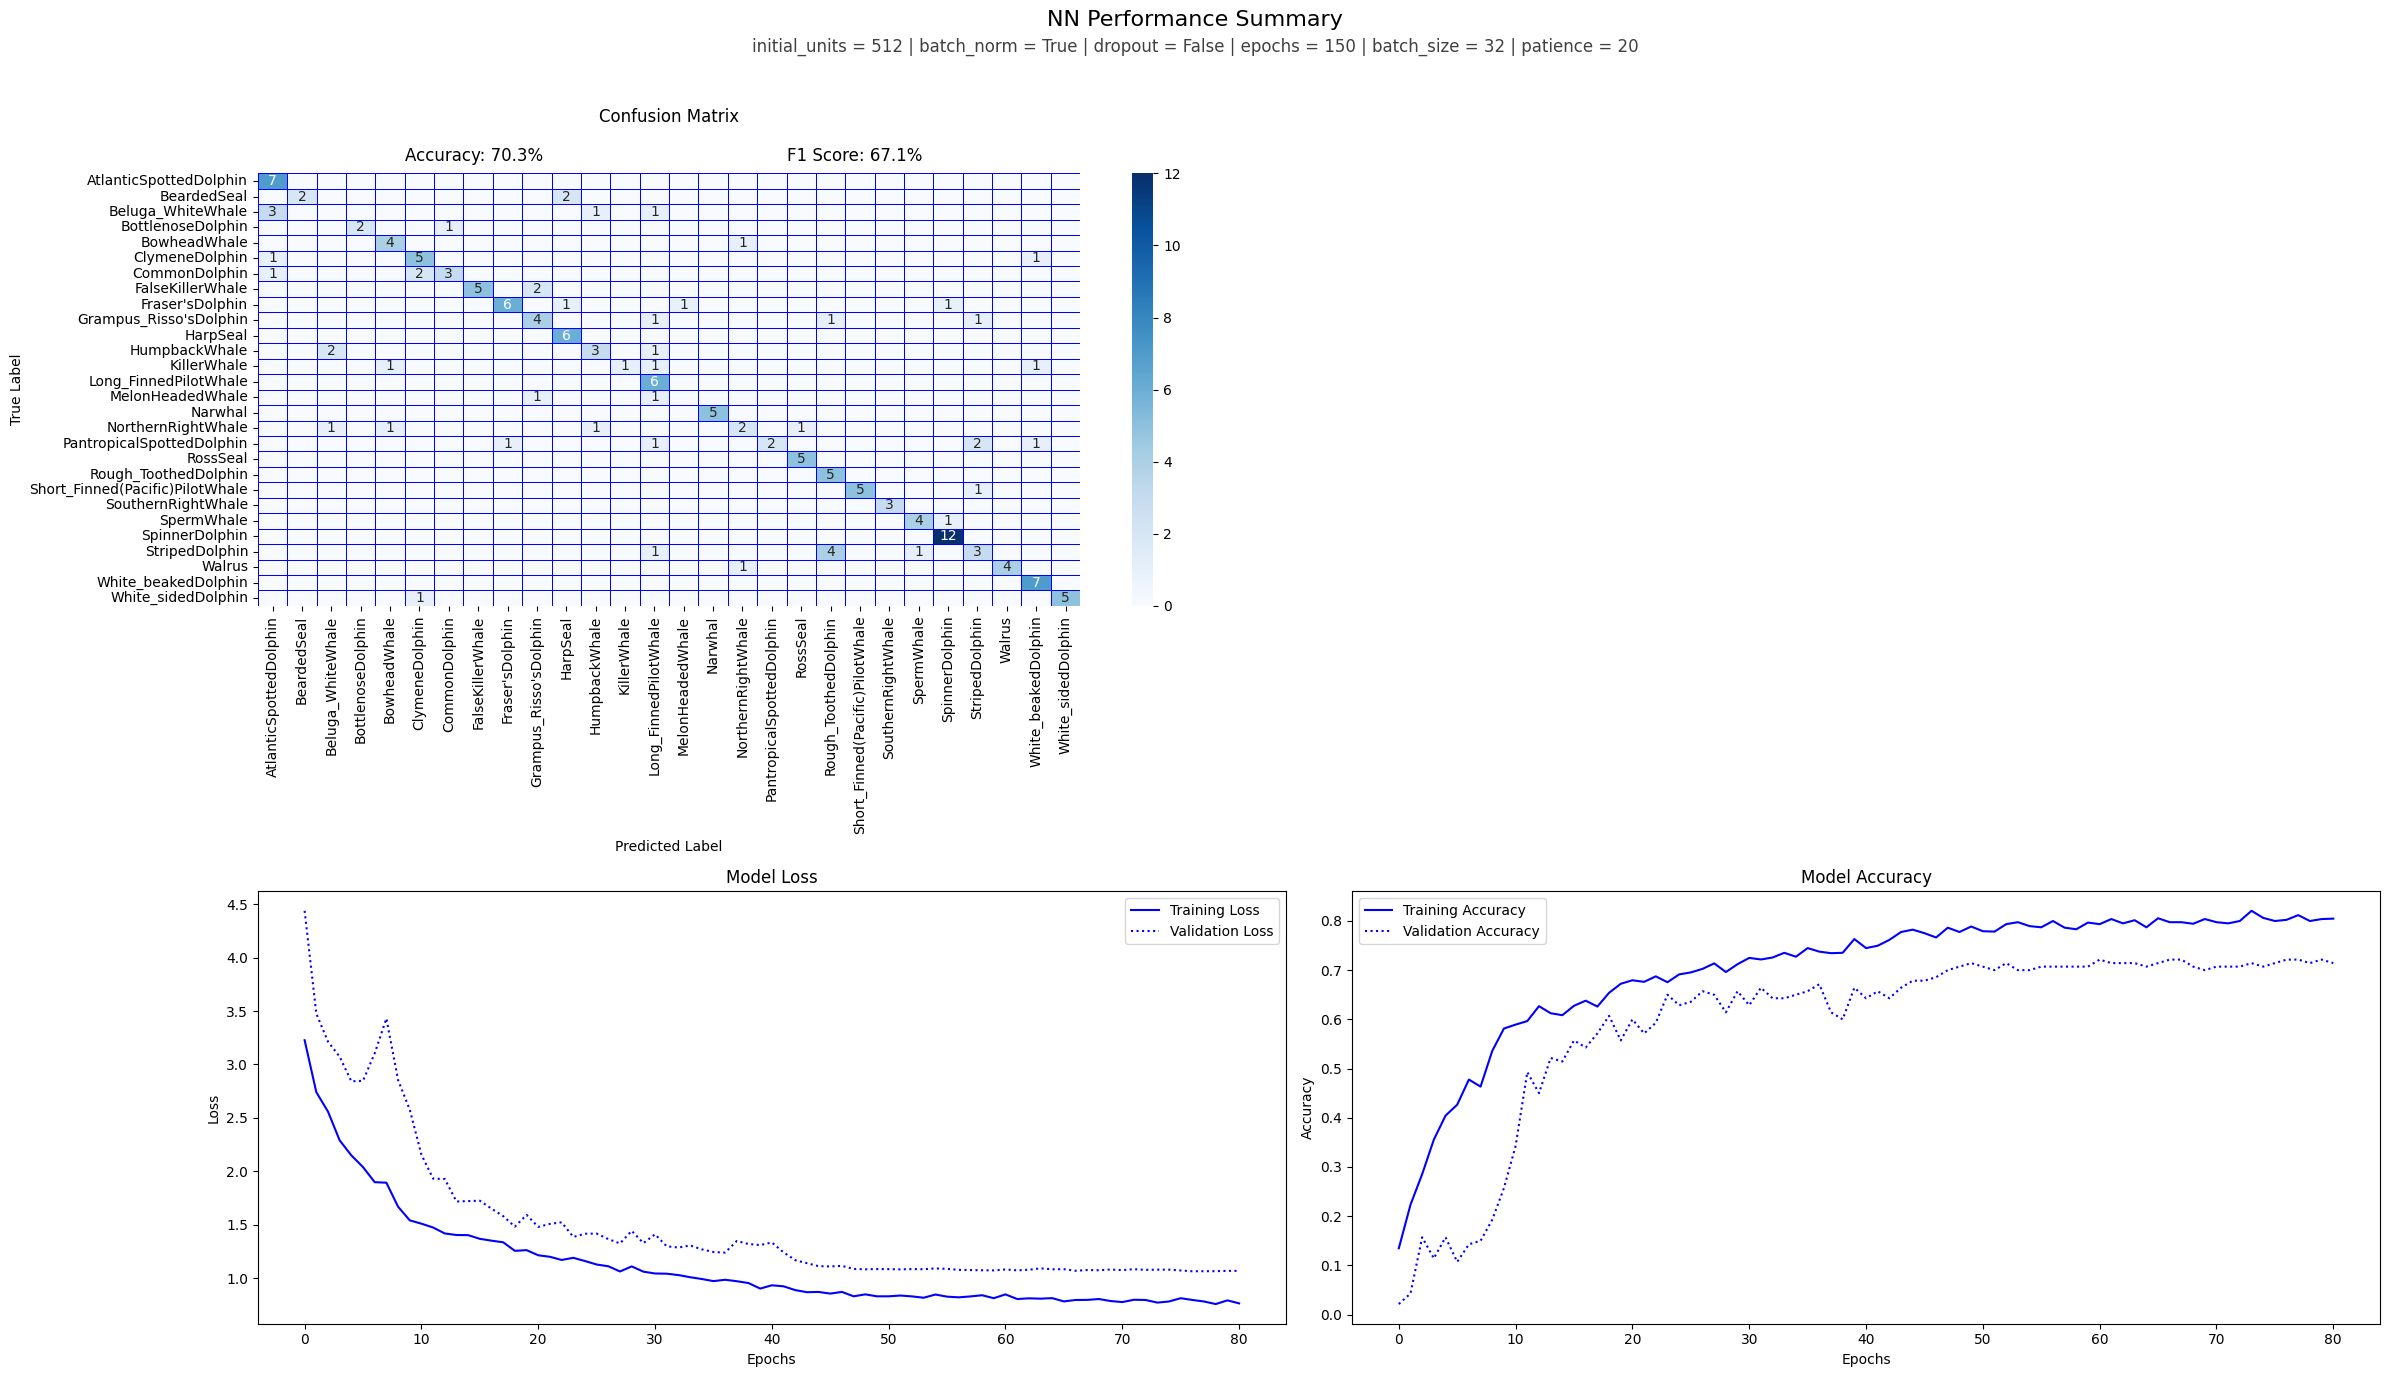

In [7]:
process_pipeline('512_150_32_20', 512, True, False, 150, 32, 20)

Epoch 1/150
20/20 [==============================] - 3s 34ms/step - loss: 3.6128 - accuracy: 0.0638 - val_loss: 4.7166 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 2/150
20/20 [==============================] - 0s 20ms/step - loss: 3.1715 - accuracy: 0.1340 - val_loss: 4.2846 - val_accuracy: 0.0214 - lr: 0.0010
Epoch 3/150
20/20 [==============================] - 0s 22ms/step - loss: 2.9282 - accuracy: 0.1786 - val_loss: 3.7175 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 4/150
20/20 [==============================] - 0s 21ms/step - loss: 2.6808 - accuracy: 0.2648 - val_loss: 3.4782 - val_accuracy: 0.0714 - lr: 0.0010
Epoch 5/150
20/20 [==============================] - 0s 21ms/step - loss: 2.5385 - accuracy: 0.2935 - val_loss: 3.2451 - val_accuracy: 0.1214 - lr: 0.0010
Epoch 6/150
20/20 [==============================] - 0s 20ms/step - loss: 2.4306 - accuracy: 0.3110 - val_loss: 3.1663 - val_accuracy: 0.1286 - lr: 0.0010
Epoch 7/150
20/20 [==============================] - 0s 19ms/step - lo

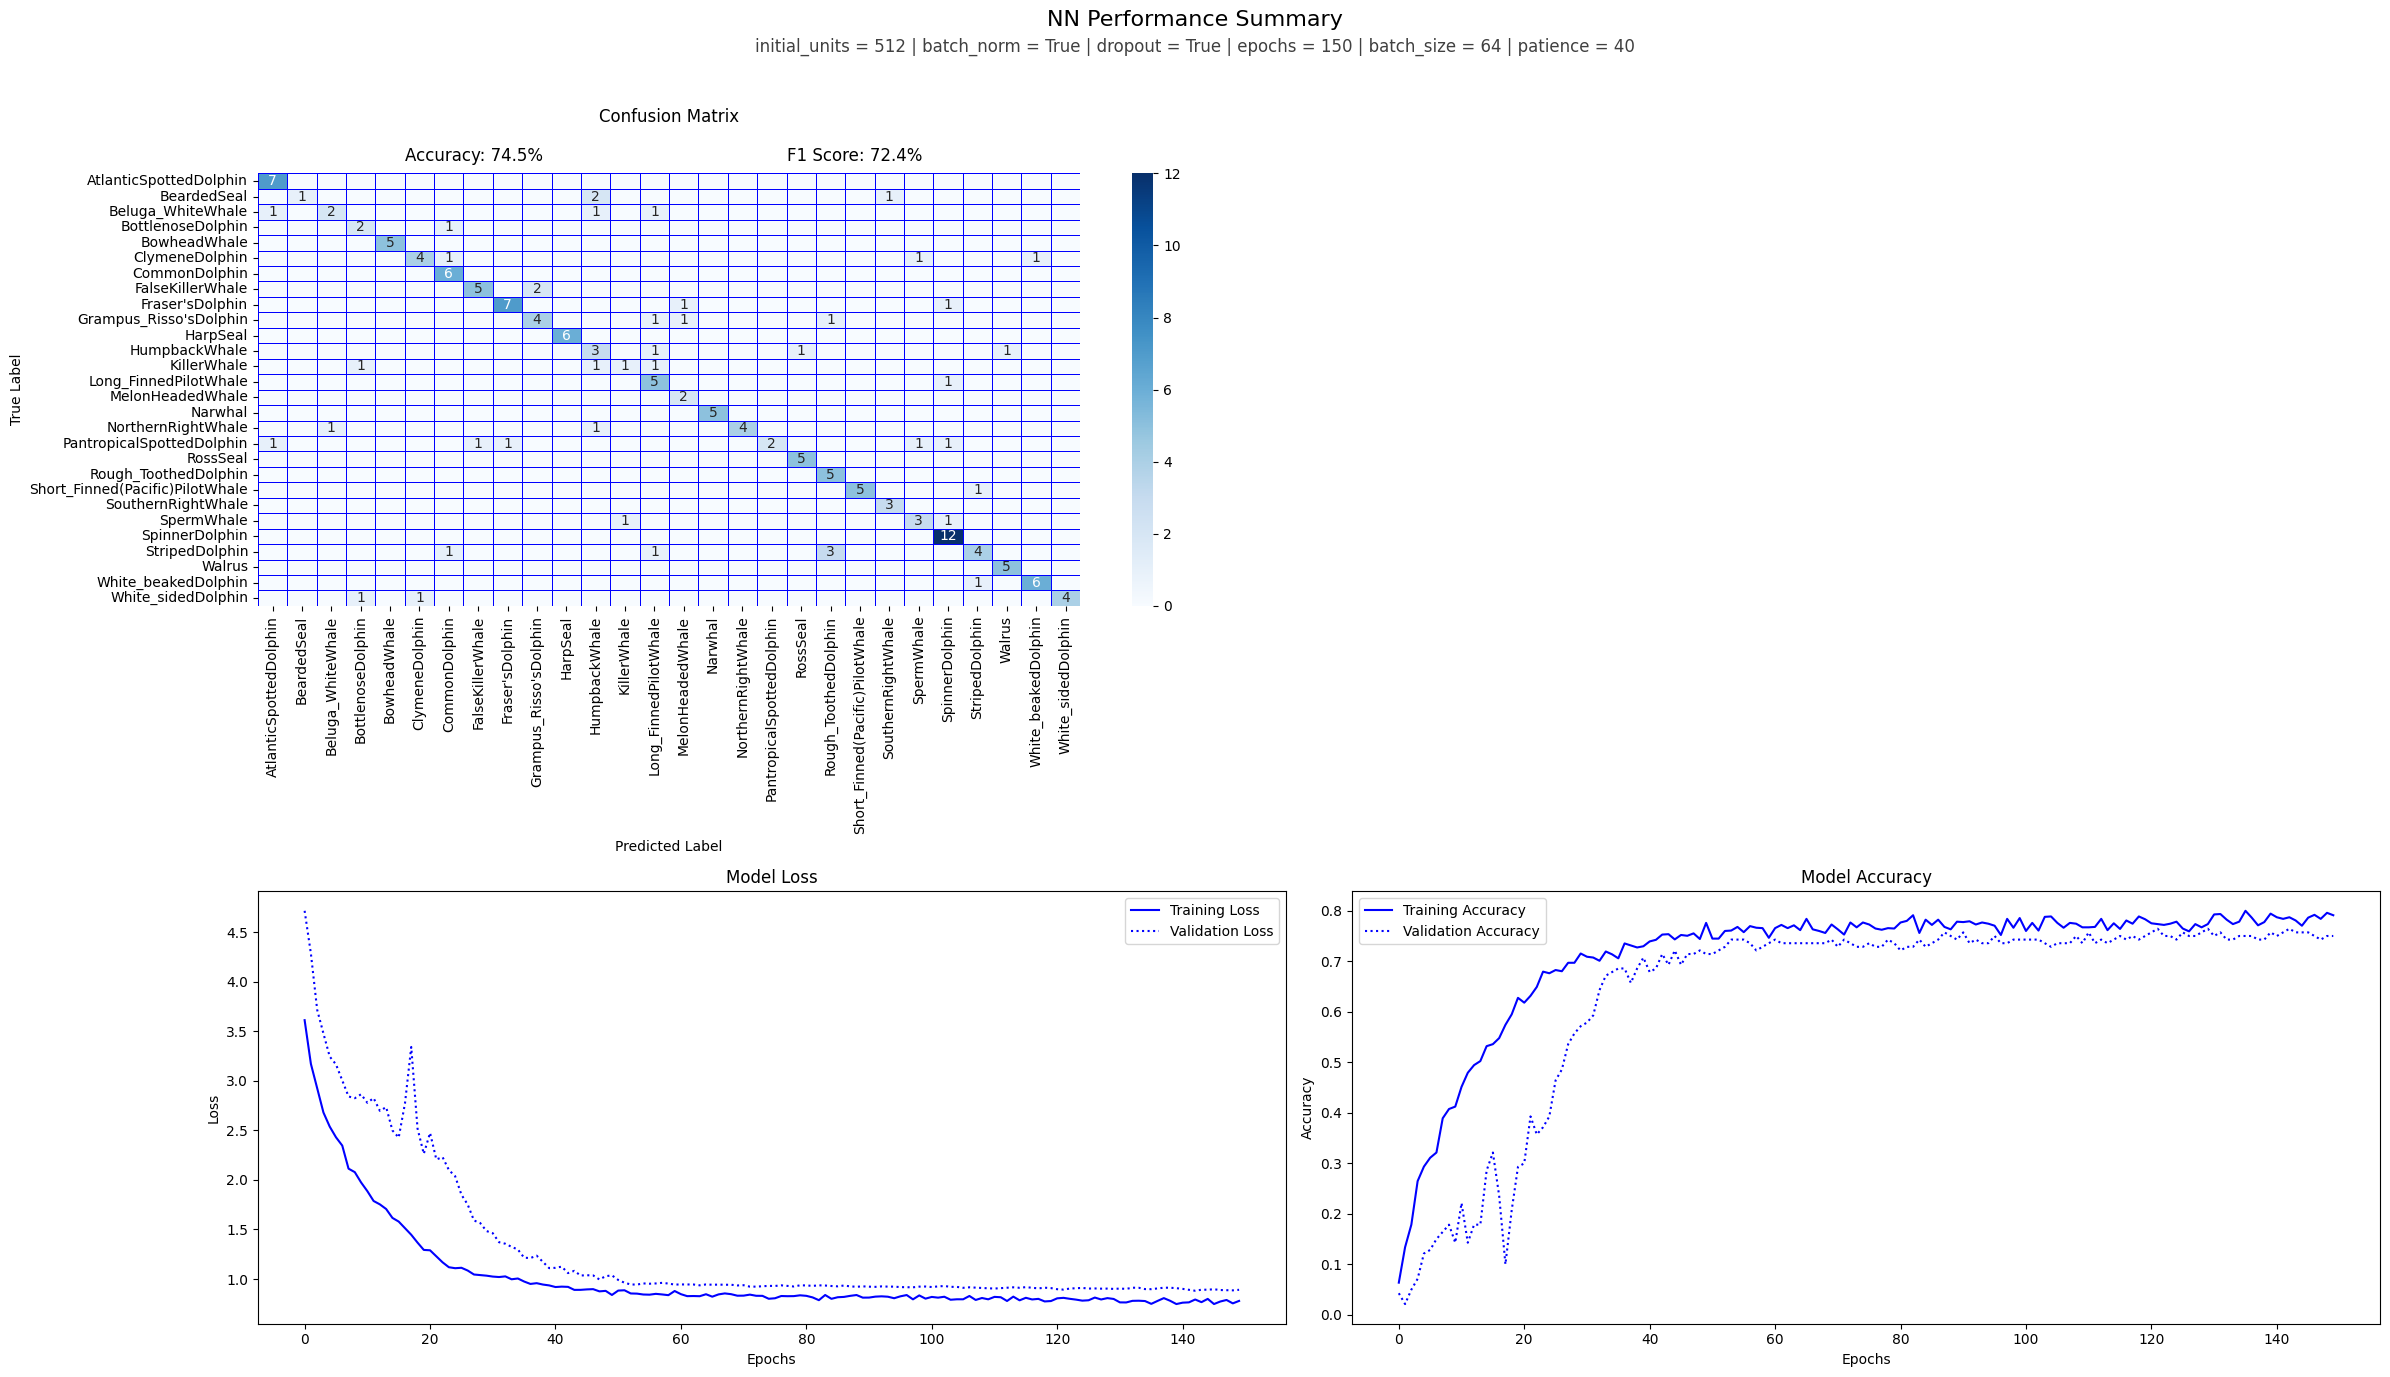

In [8]:
process_pipeline('512_150_64_20', 512, True, True, 150, 64, 40)

Epoch 1/150
20/20 [==============================] - 3s 24ms/step - loss: 3.3641 - accuracy: 0.1005 - val_loss: 4.8763 - val_accuracy: 0.0429 - lr: 0.0010
Epoch 2/150
20/20 [==============================] - 0s 12ms/step - loss: 2.8113 - accuracy: 0.2368 - val_loss: 3.9779 - val_accuracy: 0.0571 - lr: 0.0010
Epoch 3/150
20/20 [==============================] - 0s 11ms/step - loss: 2.5524 - accuracy: 0.2911 - val_loss: 3.4967 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 4/150
20/20 [==============================] - 0s 10ms/step - loss: 2.3623 - accuracy: 0.3262 - val_loss: 3.3098 - val_accuracy: 0.0714 - lr: 0.0010
Epoch 5/150
20/20 [==============================] - 0s 11ms/step - loss: 2.1392 - accuracy: 0.4171 - val_loss: 3.2045 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 6/150
20/20 [==============================] - 0s 11ms/step - loss: 1.9782 - accuracy: 0.4537 - val_loss: 3.0857 - val_accuracy: 0.1714 - lr: 0.0010
Epoch 7/150
20/20 [==============================] - 0s 13ms/step - lo

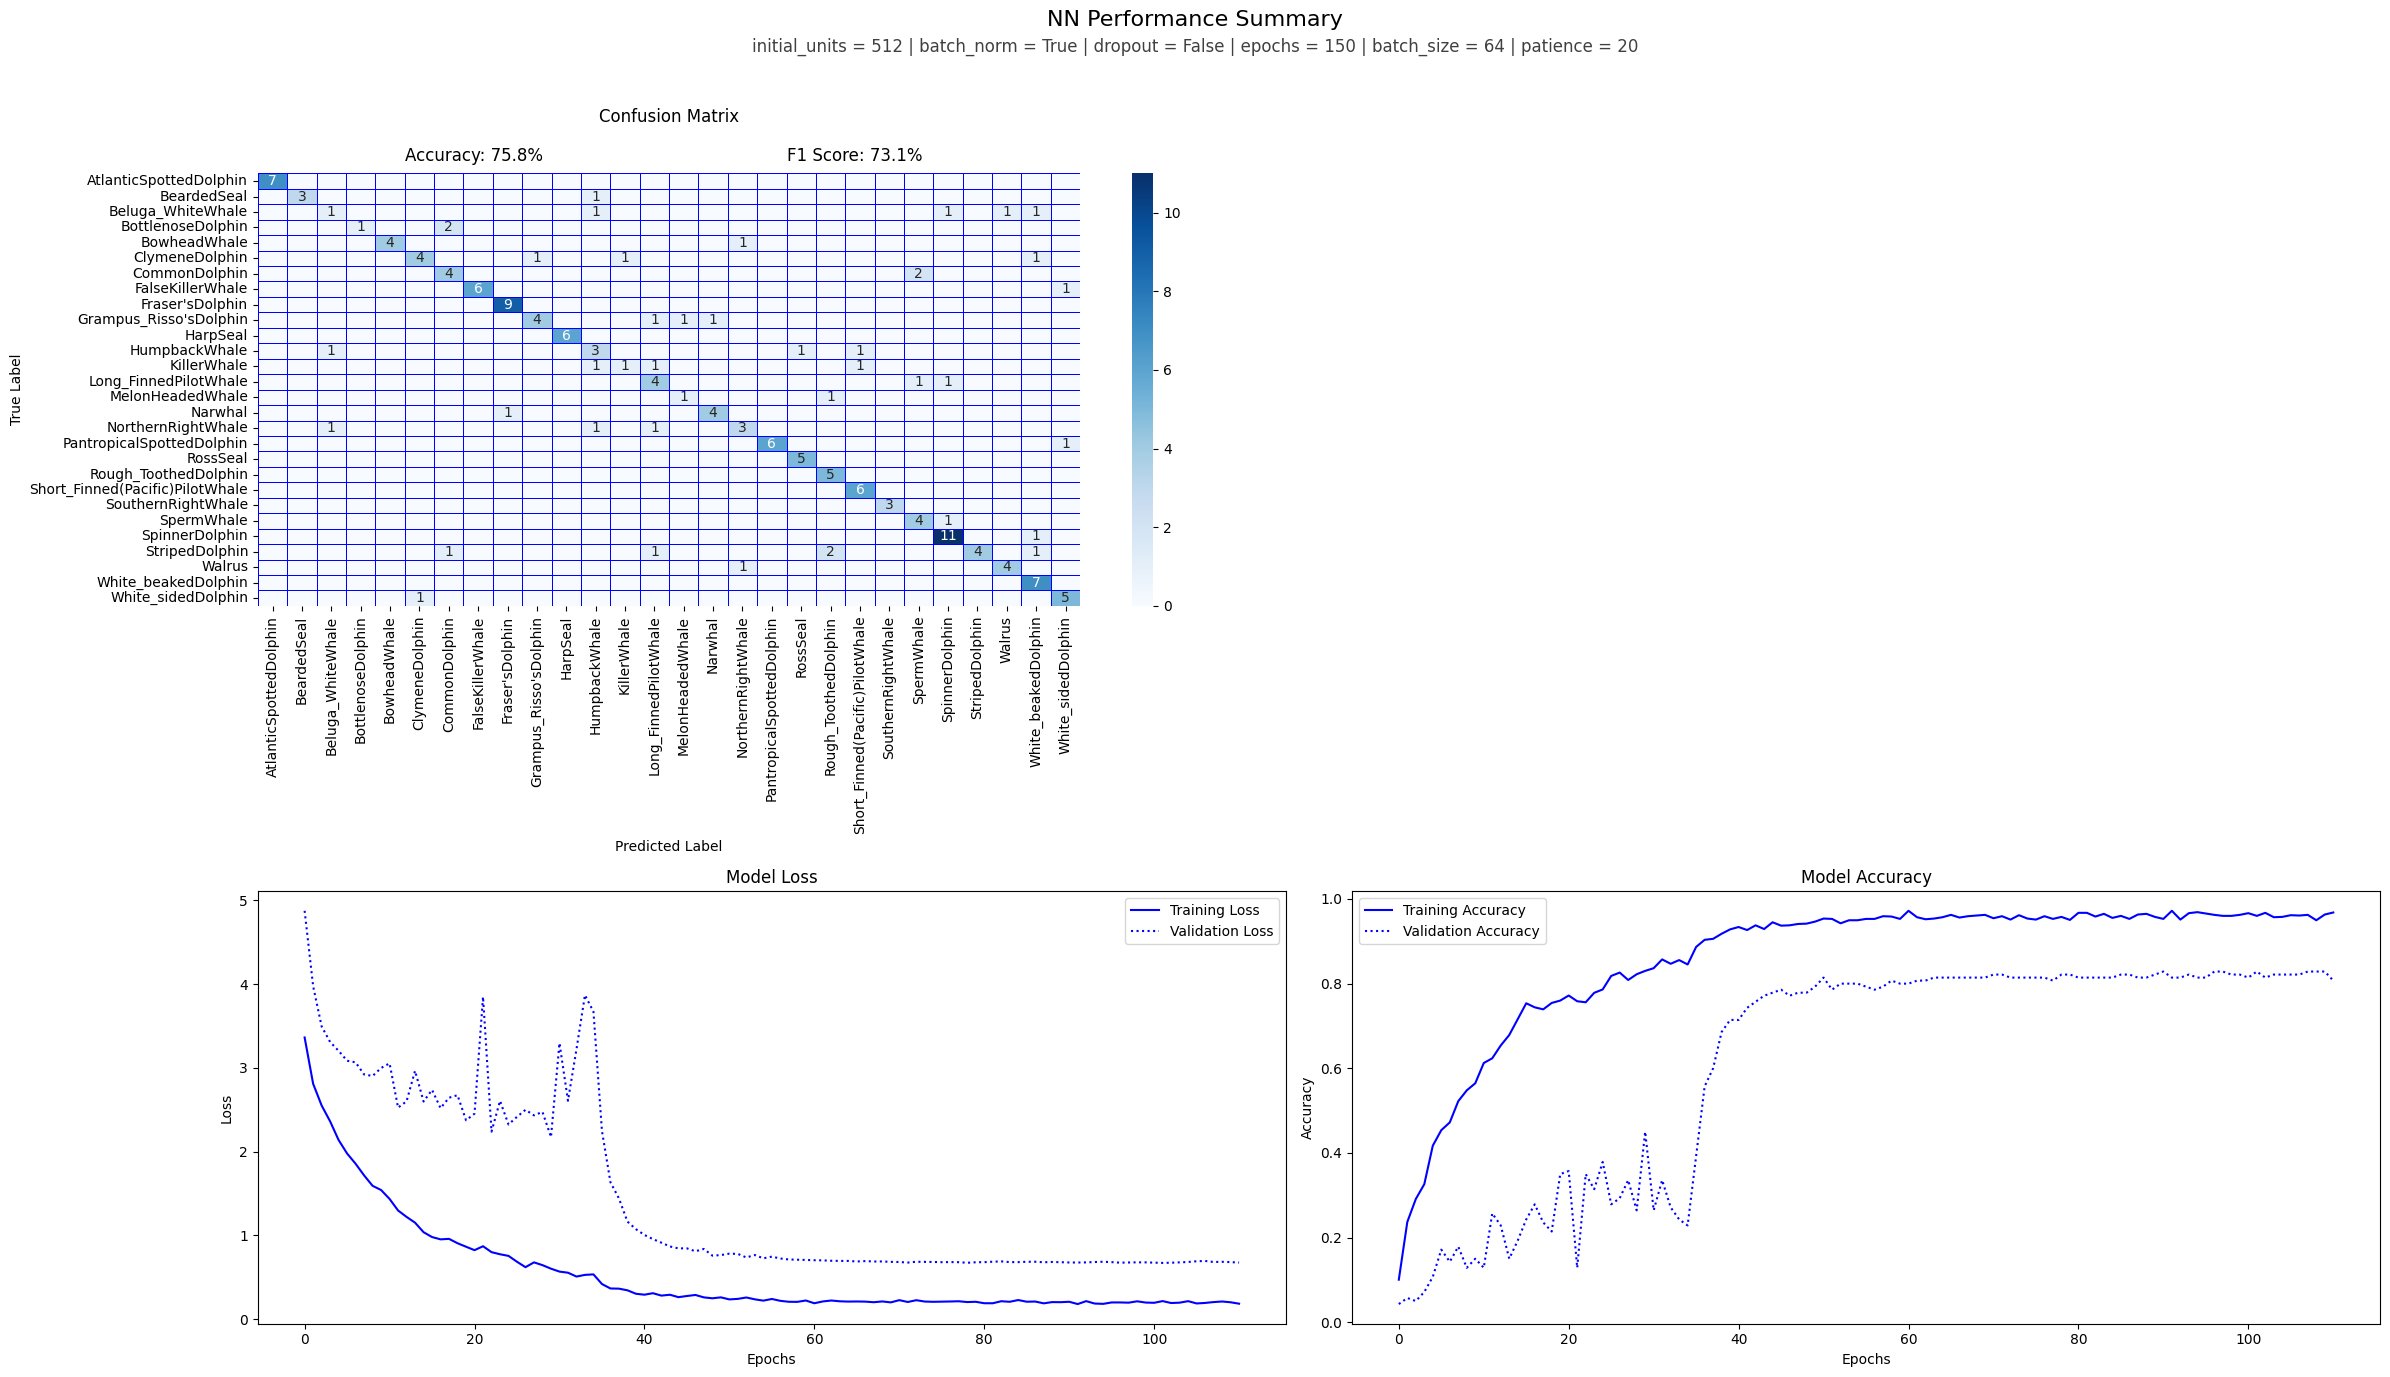

In [12]:
process_pipeline('512_150_64_20', 512, True, False, 150, 64, 20)